In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from func import *

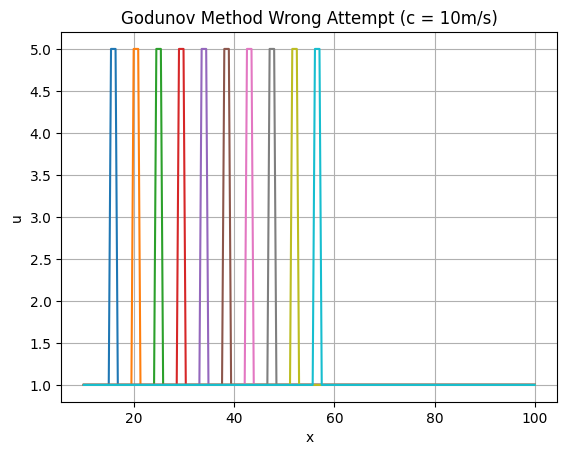

In [2]:
Lmin = 10
Lmax = 100
steps = 200

start = 2
end = 5
height = 5
c = 10
spot = c

x = np.linspace(Lmin, Lmax, steps)

for i in range(10):
    vals = np.linspace(1, 1, steps)
    
    for j in range(steps):
        if j < spot + start:
            vals[j] = 1
        elif j < spot + end:
            vals[j] = height
        else:
            vals[j] = 1
    # vals[spot + start:spot + end] = height
    plt.plot(x, vals)
    
    spot += c
             
plt.title(f'Godunov Method Wrong Attempt (c = {c}m/s)')
plt.ylabel('u')
plt.xlabel('x')
plt.grid()
plt.show()

In [23]:
# Advection equation

c = 10 #m/s
N = 90 # number of plot points
x = np.linspace(0,100,N)
dx = x[1]-x[0]
dt = 0.5*dx/c
rhog = 1.6 # kg/m^3
rhop = 2500 # kg/m^3, particle density

D = 115e-6 # m, particle diameter
Vp = 4/3 * np.pi * (D/2)**3 # particle volume
M = Vp * rhop # particle mass = volume * density
A = np.pi/4 * D**2 # projected area

print('M: ', M)

val = 90

Fd_arr = np.zeros((val,))
xp_arr = np.zeros((val,))
up_arr = np.zeros((val,))

x0 = 60 # initial x position of particle
u0 = 0 # initial velocity of particle

xp_arr[0] = x0
up_arr[0] = u0

u = np.ones(N)
u[0] = 1

u[10:20] = 5

# plt.plot(x,u)

for j in range(val):
    for i in range(N-1):
        uL = u[i]
        uR = u[i+1]
        u[i+1] = (uL*c*dt+uR*(dx-c*dt))/dx
        
    u[0] = u[N-1]
    
    Cd = Cd_Sternin(0)
    Fd_arr[j] = Cd * rhog * A * (kernel2(xp_arr[j], 'p', u, dx) - int(up_arr[j]))**2 / 2
    print('Fd:', Fd_arr[j])

    if j != val - 1:
        up_arr[j + 1] = up_arr[j] + Fd_arr[j]/M * dt
        xp_arr[j + 1] = xp_arr[j] + up_arr[j] * dt
        
    # plt.plot(x,u)
    
up_arr[0] = up_arr[1]
Fd_arr[0] = Fd_arr[1]

# plt.title(f'Godunov method (c = {c}m/s, advection)')
# plt.ylabel('u')
# plt.xlabel('x')
# plt.grid()
# plt.show()

plt.title(f'Particle Position')
plt.ylabel('xp')
plt.xlabel('x')
plt.plot(x, xp_arr)
plt.show()

plt.title(f'Particle Velocity')
plt.ylabel('up')
plt.xlabel('x')
plt.plot(x, up_arr)
plt.show()

plt.title(f'Drag Force')
plt.ylabel('Fd')
plt.xlabel('x')
plt.plot(x, Fd_arr)
plt.show()

M:  1.990820719595157e-09
Fd: 3.489995280699416e-09
Fd: 3.4899953114368195e-09
Fd: 3.4899955778316745e-09
Fd: 3.4899971618366047e-09
Fd: 3.4900044254097066e-09
Fd: 3.4900318028350982e-09
Fd: 3.490120087638442e-09
Fd: 3.4903704422273725e-09
Fd: 3.4910073336095203e-09
Fd: 3.492482992581306e-09
Fd: 3.4956341660931764e-09
Fd: 1.0127621340555603e-14
Fd: 3.966478151534859e-14
Fd: 1.3851054693703937e-13
Fd: 4.3601202472724465e-13
Fd: 1.248859192071591e-12
Fd: 3.2811802497558514e-12
Fd: 7.963328084756544e-12
Fd: 9.9187643894939e-12
Fd: 2.1635643944161446e-11
Fd: 4.4279713890606964e-11
Fd: 8.539660090164845e-11
Fd: 1.557979535586485e-10
Fd: 2.6982725309601176e-10
Fd: 4.450256836780147e-10
Fd: 7.009788029865407e-10
Fd: 1.0572531595982037e-09
Fd: 1.5305325678540128e-09
Fd: 2.131293987776124e-09
Fd: 2.8605606278807744e-09
Fd: 3.707371531126054e-09
Fd: 4.647569152862352e-09
Fd: 5.644322142914437e-09
Fd: 6.650503481652489e-09
Fd: 6.56472076329552e-09
Fd: 7.54533467213406e-10
Fd: 1.0324215391887849e-

IndexError: index 381 is out of bounds for axis 0 with size 90

In [4]:
kernel2(50, 'p', u, dx)

1.1250539158072004

# Animation

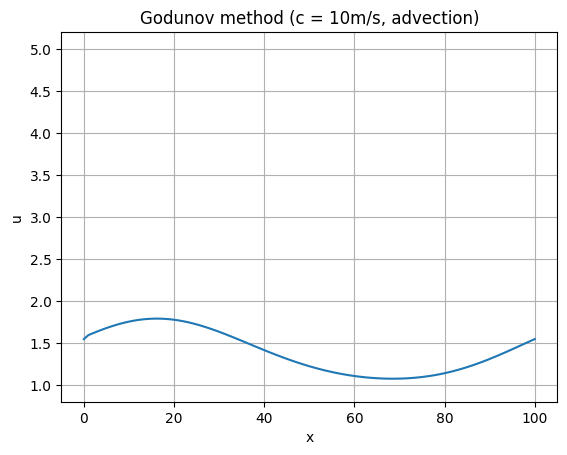

In [5]:
fig, ax = plt.subplots()

c = 10 #m/s
N = 100 # number of plot points
x = np.linspace(0,100,N)
dx = x[1]-x[0]
dt = 0.5*dx/c

vals = np.ones(N)
vals[0] = 1
vals[10:20] = 5

u, = ax.plot(x, vals)

def animate(i):
    for i in range(N-1):
        uL = vals[i]
        uR = vals[i+1]
        vals[i+1] = (uL*c*dt+uR*(dx-c*dt))/dx
        
    vals[0] = vals[N-1] 
    
    u.set_ydata(vals)  # update the data.
    return u,

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=200)

writergif = animation.PillowWriter(fps=30)
ani.save('advection.gif',writer=writergif)

plt.title(f'Godunov method (c = {c}m/s, advection)')
plt.ylabel('u')
plt.xlabel('x')
plt.grid()
plt.show()

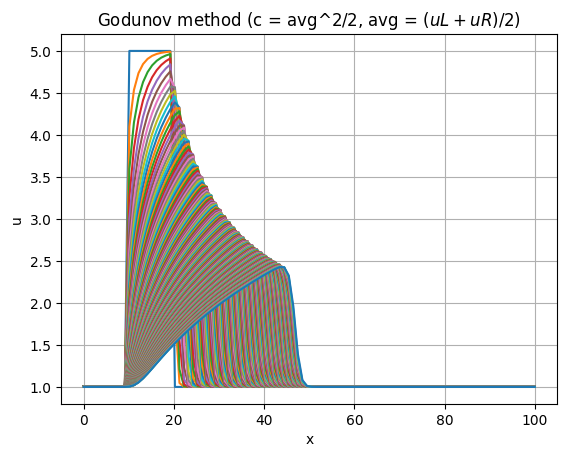

In [6]:
c = 10 #m/s
N = 100 # number of plot points
x = np.linspace(0,100,N)
dx = x[1]-x[0]
dt = 0.5*dx/c

u = np.ones(N)
u[0] = 1

u[10:20] = 5

plt.plot(x,u)

for j in range(200):
    for i in range(N-1):
        uL = u[i]
        uR = u[i+1]
        avg = (uL + uR)/ 2
        c = avg**2/2
        u[i+1] = (uL*c*dt+uR*(dx-c*dt))/dx
        
    u[0] = u[N-1]    
    plt.plot(x,u)

plt.title(f'Godunov method (c = avg^2/2, avg = $(uL + uR)/2$)')
plt.ylabel('u')
plt.xlabel('x')
plt.grid()
plt.show()

# Animation

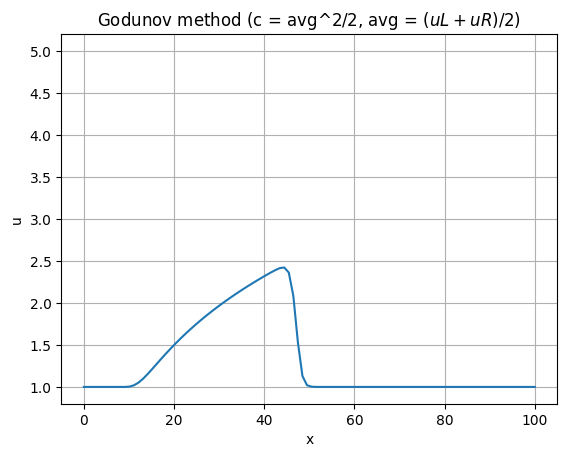

In [7]:
fig, ax = plt.subplots()

c = 10 #m/s
N = 100 # number of plot points
x = np.linspace(0,100,N)
dx = x[1]-x[0]
dt = 0.5*dx/c

vals = np.ones(N)
vals[0] = 1
vals[10:20] = 5

u, = ax.plot(x, vals)

def animate(i):
    for i in range(N-1):
        uL = vals[i]
        uR = vals[i+1]
        avg = (uL + uR)/ 2
        c = avg**2/2
        vals[i+1] = (uL*c*dt+uR*(dx-c*dt))/dx
        
    vals[0] = vals[N-1] 
    
    u.set_ydata(vals)  # update the data.
    return u,

ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=200)

writergif = animation.PillowWriter(fps=30)
ani.save('godunov_method.gif',writer=writergif)

plt.title(f'Godunov method (c = avg^2/2, avg = $(uL + uR)/2$)')
plt.ylabel('u')
plt.xlabel('x')
plt.grid()
plt.show()

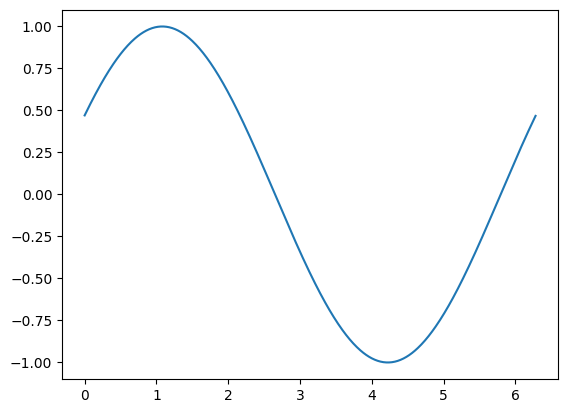

In [8]:
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
u, = ax.plot(x, np.sin(x))


def animate(i):
    u.set_ydata(np.sin(x + i / 100))  # update the data.
    return u,


ani = animation.FuncAnimation(fig, animate, interval=20, blit=True, save_count=50)

# To save the animation, use
writergif = animation.PillowWriter(fps=30)
ani.save('test.gif',writer=writergif)

plt.show()